In [117]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

In [118]:
df1 = pd.read_csv("data/train.csv")
df2 = pd.read_csv("data/meal_info.csv")
df3 = pd.read_csv("data/fulfilment_center_info.csv")

In [119]:
df = pd.merge(df1, df2,  on="meal_id", how="outer")

In [120]:
dff = pd.merge(df, df3, on="center_id", how="outer")

In [121]:
dff

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


In [122]:
dff.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5
456547,1443704,145,61,2104,581.03,582.03,0,0,27,Fish,Continental,473,77,TYPE_A,4.5


# Data Preprocessing

In [123]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [124]:
dff.duplicated().sum()

0

In [125]:
dff.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [126]:
dff.meal_id.nunique()

51

In [127]:
dff.cuisine.nunique()

4

In [128]:
dff.city_code.nunique()

51

# EDA

In [75]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='meal_id', ylabel='num_orders'>

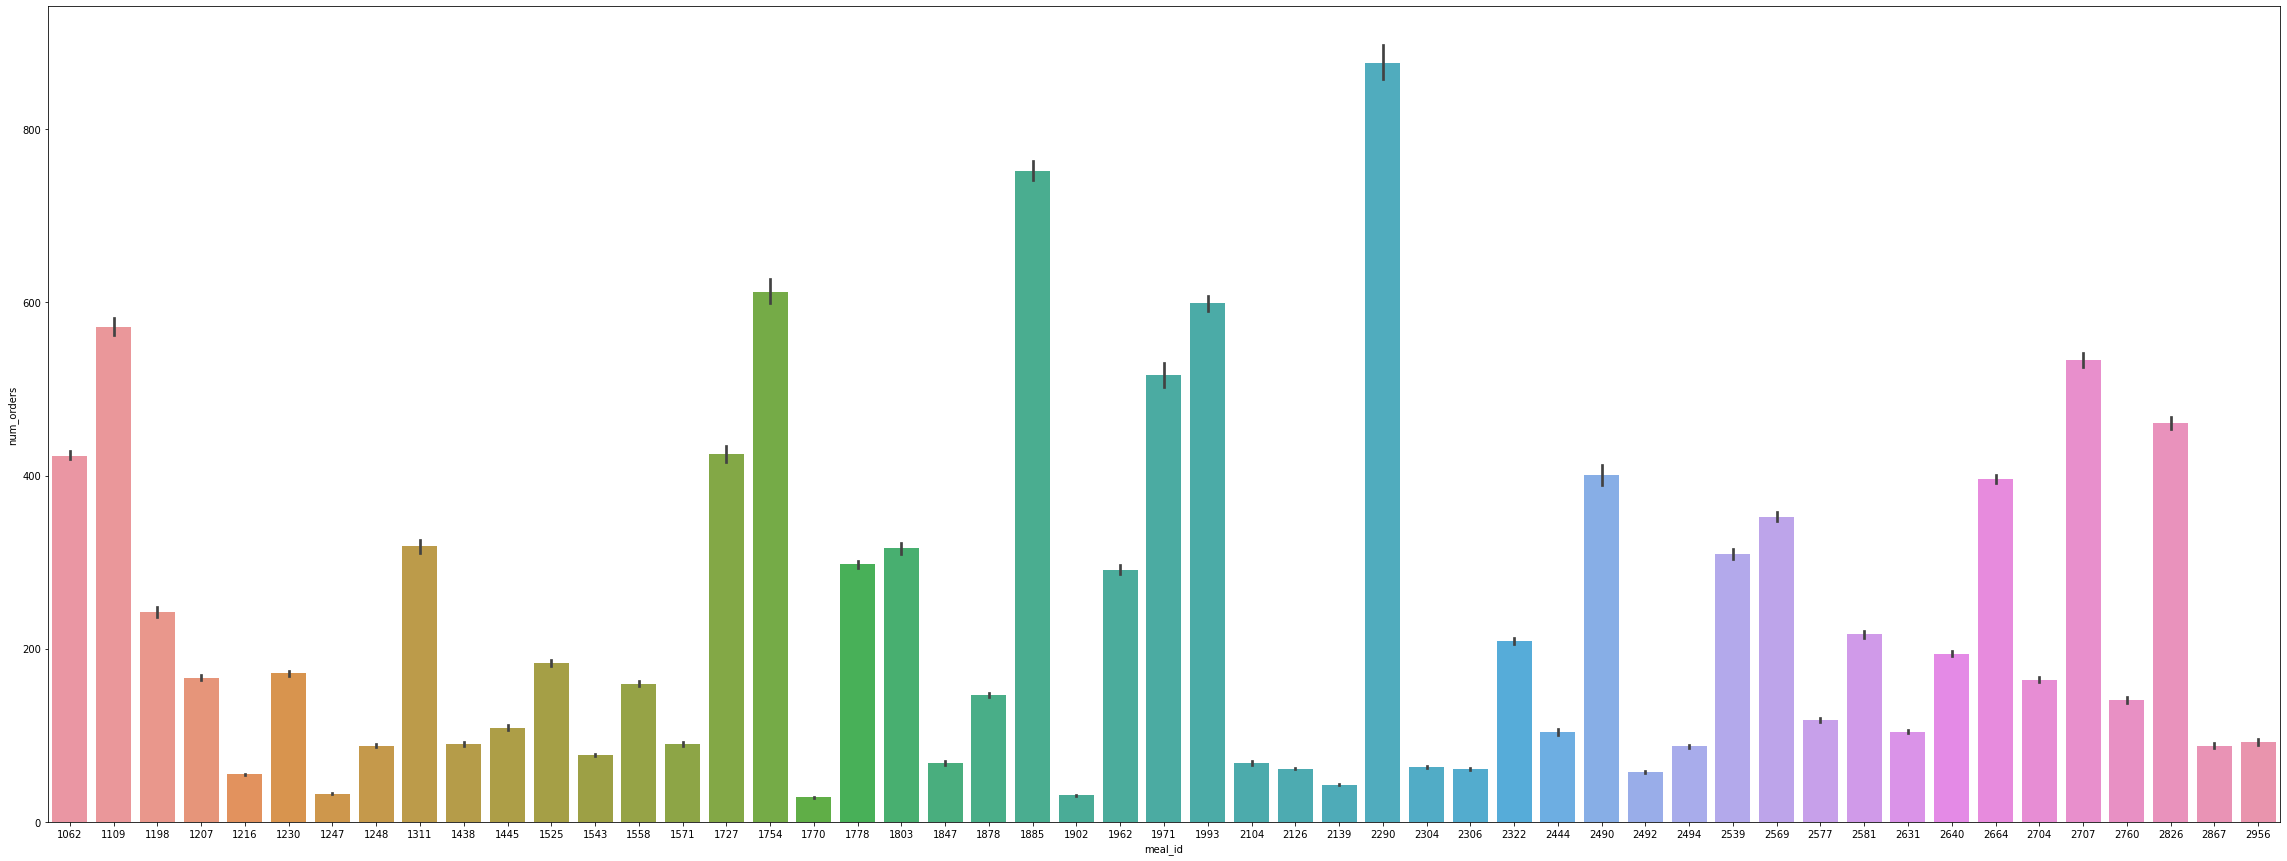

In [76]:
plt.subplots(figsize=(40,15))
sns.barplot(x= 'meal_id', y='num_orders',data=dff)

<AxesSubplot:xlabel='meal_id', ylabel='checkout_price'>

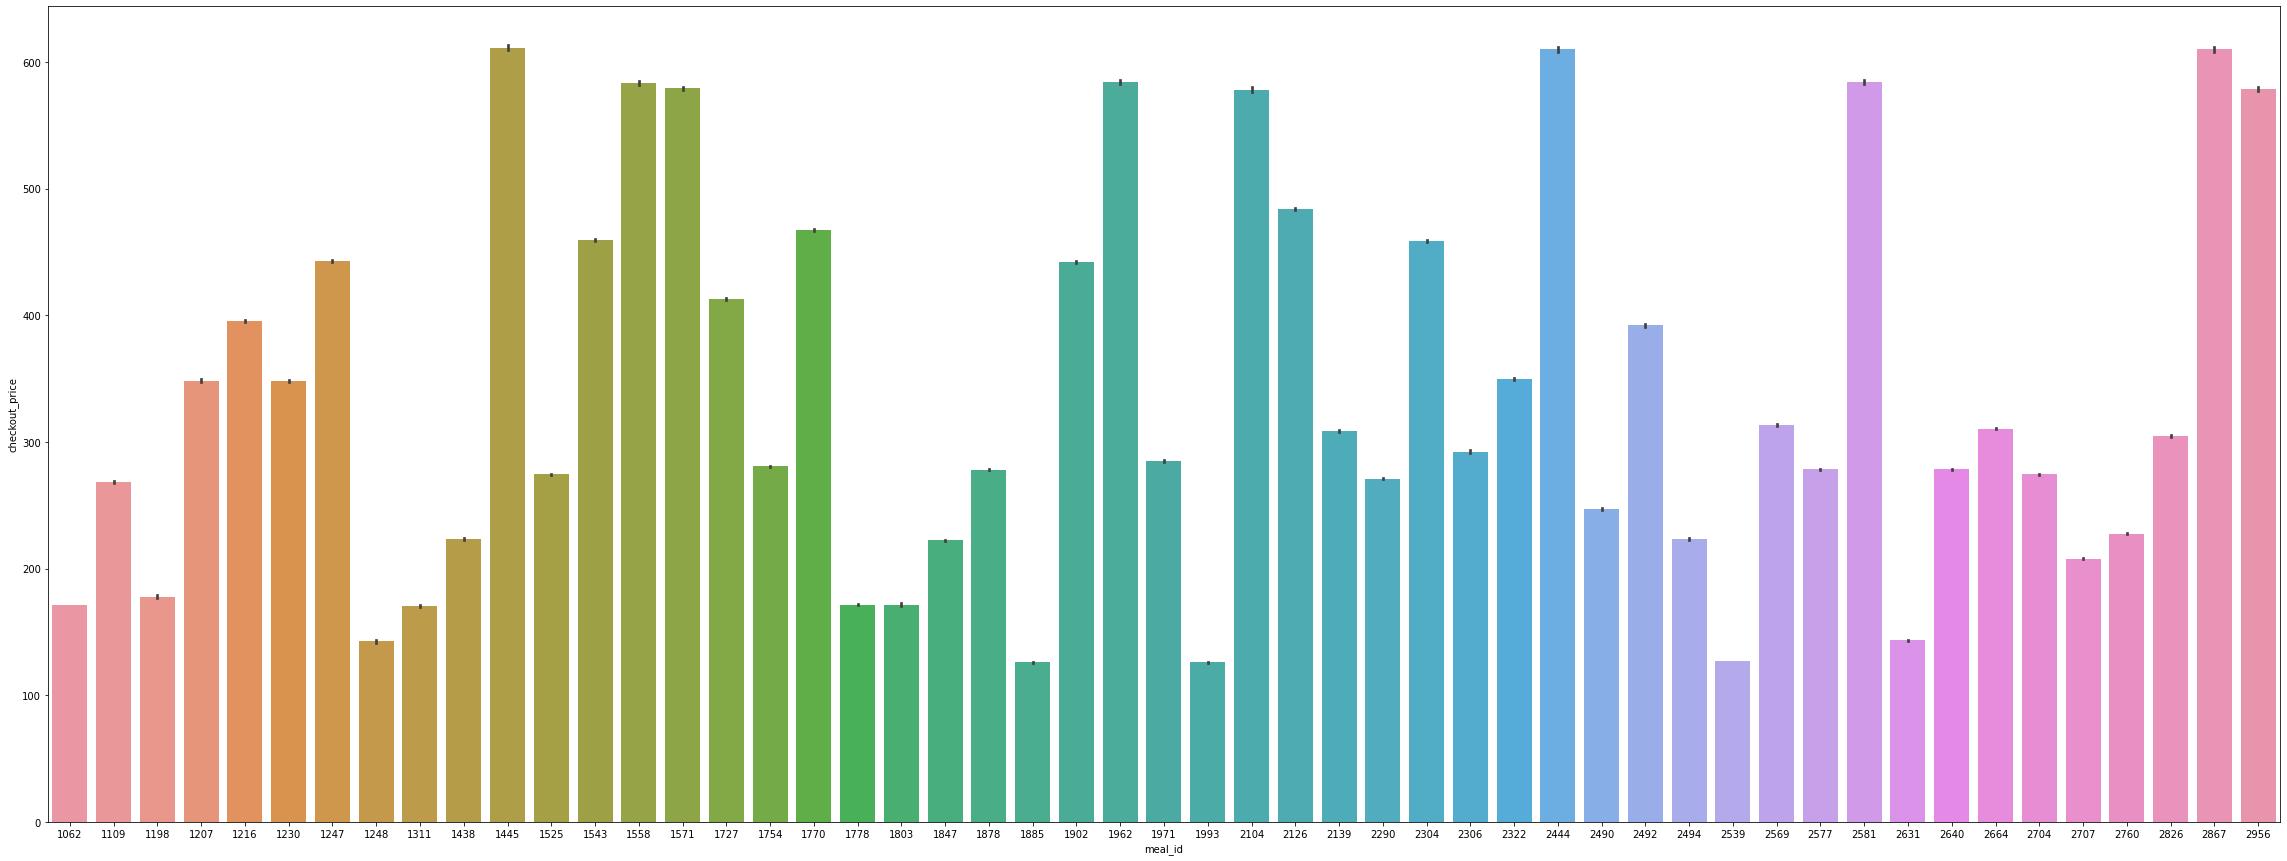

In [77]:
plt.subplots(figsize=(40,15))
sns.barplot(x= 'meal_id', y='checkout_price',data=dff)

<AxesSubplot:xlabel='emailer_for_promotion', ylabel='num_orders'>

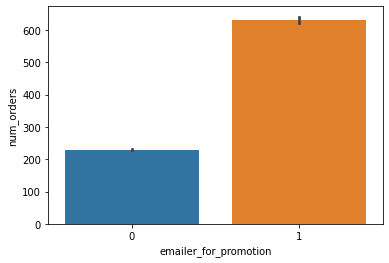

In [78]:
sns.barplot(x= 'emailer_for_promotion', y='num_orders',data=dff)

<AxesSubplot:xlabel='center_type', ylabel='num_orders'>

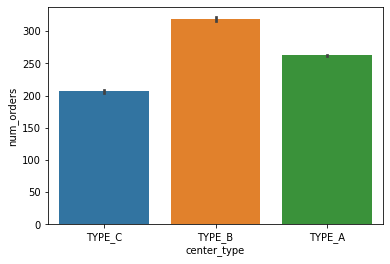

In [79]:
sns.barplot(x= 'center_type', y='num_orders',data=dff)

<AxesSubplot:ylabel='Density'>

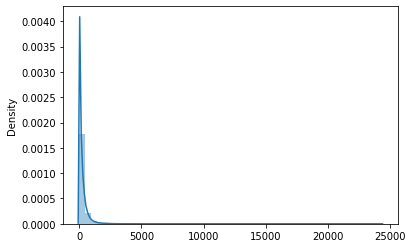

In [80]:
sns.distplot(x=dff['num_orders'])

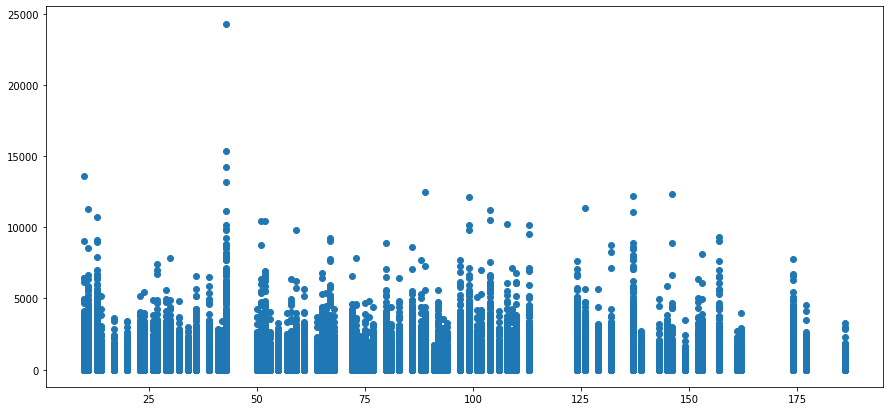

In [81]:
plt.subplots(figsize=(15,7))
plt.scatter(dff['center_id'],dff['num_orders'])

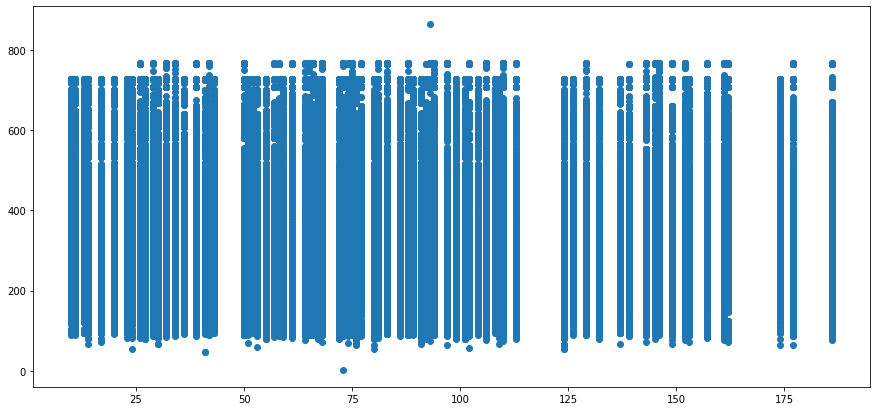

In [82]:
plt.subplots(figsize=(15,7))
plt.scatter(dff['center_id'],dff['checkout_price'])

# Outliers Treatment

<AxesSubplot:xlabel='num_orders'>

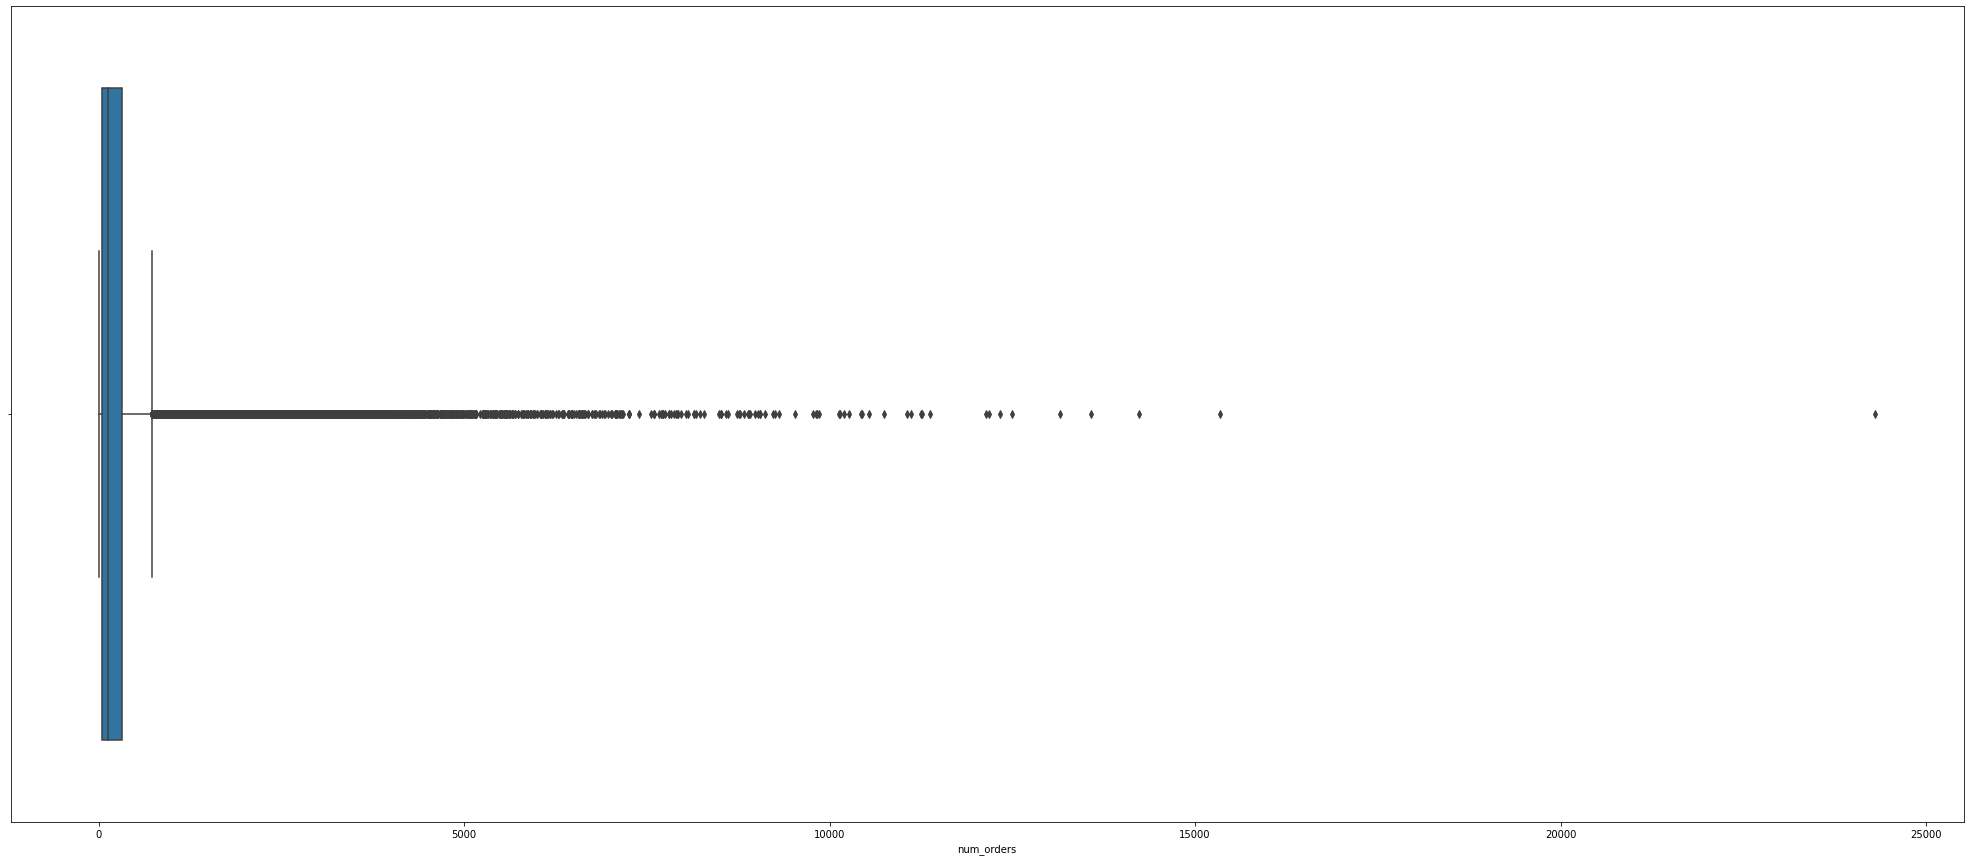

In [129]:
plt.subplots(figsize=(35,15))
sns.boxplot(dff['num_orders'])

In [130]:
q1=dff.num_orders.quantile(0.25)
q3=dff.num_orders.quantile(0.75)
q1,q3

(54.0, 324.0)

In [131]:
IQR=q3-q1
IQR

270.0

In [132]:
lower_bound=q1-3*IQR
upper_bound=q3+3*IQR
lower_bound,upper_bound

(-756.0, 1134.0)

In [133]:
index = dff[(dff['num_orders'] >= 10000)].index
dff.drop(index, inplace=True)
           

In [134]:
dff.shape

(456526, 15)

In [135]:
dff[(dff['num_orders'] < -756.0)].shape

(0, 15)

# Train-Test Split

In [138]:
from sklearn.model_selection import train_test_split

x = dff.drop('num_orders', axis=1)
y = dff['num_orders']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.0001)
x_train.shape, x_test.shape

((456480, 14), (46, 14))

# Feature Engg. & Selection

In [139]:
x_train.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
264192,1028766,61,50,1207,280.36,325.98,0,0,0,0,556,77,0,4.8
111927,1308527,2,108,1438,243.50,270.63,0,0,12,3,579,56,1,4.4
255958,1346172,14,26,2704,280.33,280.33,0,0,5,3,515,77,2,3.0
73236,1160564,13,149,1727,425.83,427.83,0,0,8,1,478,77,0,2.4
309982,1388565,77,67,2577,291.03,290.03,0,0,13,3,638,56,1,7.0
252865,1297430,73,26,2631,151.38,150.38,0,0,0,1,515,77,2,3.0
367809,1461323,62,58,1558,433.59,640.23,0,1,7,0,695,77,2,3.8
342718,1416874,59,76,2306,339.53,339.53,0,0,6,2,614,85,0,3.0
386616,1168008,80,80,1558,679.03,680.03,0,0,7,0,604,56,2,5.1
191841,1407700,73,27,2704,246.44,291.03,0,1,5,3,713,85,0,4.5


In [137]:
from sklearn.preprocessing import LabelEncoder

lb11 = LabelEncoder()
dff['center_type'] = lb11.fit_transform(dff['center_type'])

lb22 = LabelEncoder()
dff['category'] = lb22.fit_transform(dff['category'])

lb33 = LabelEncoder()
dff['cuisine'] = lb33.fit_transform(dff['cuisine'])

<AxesSubplot:>

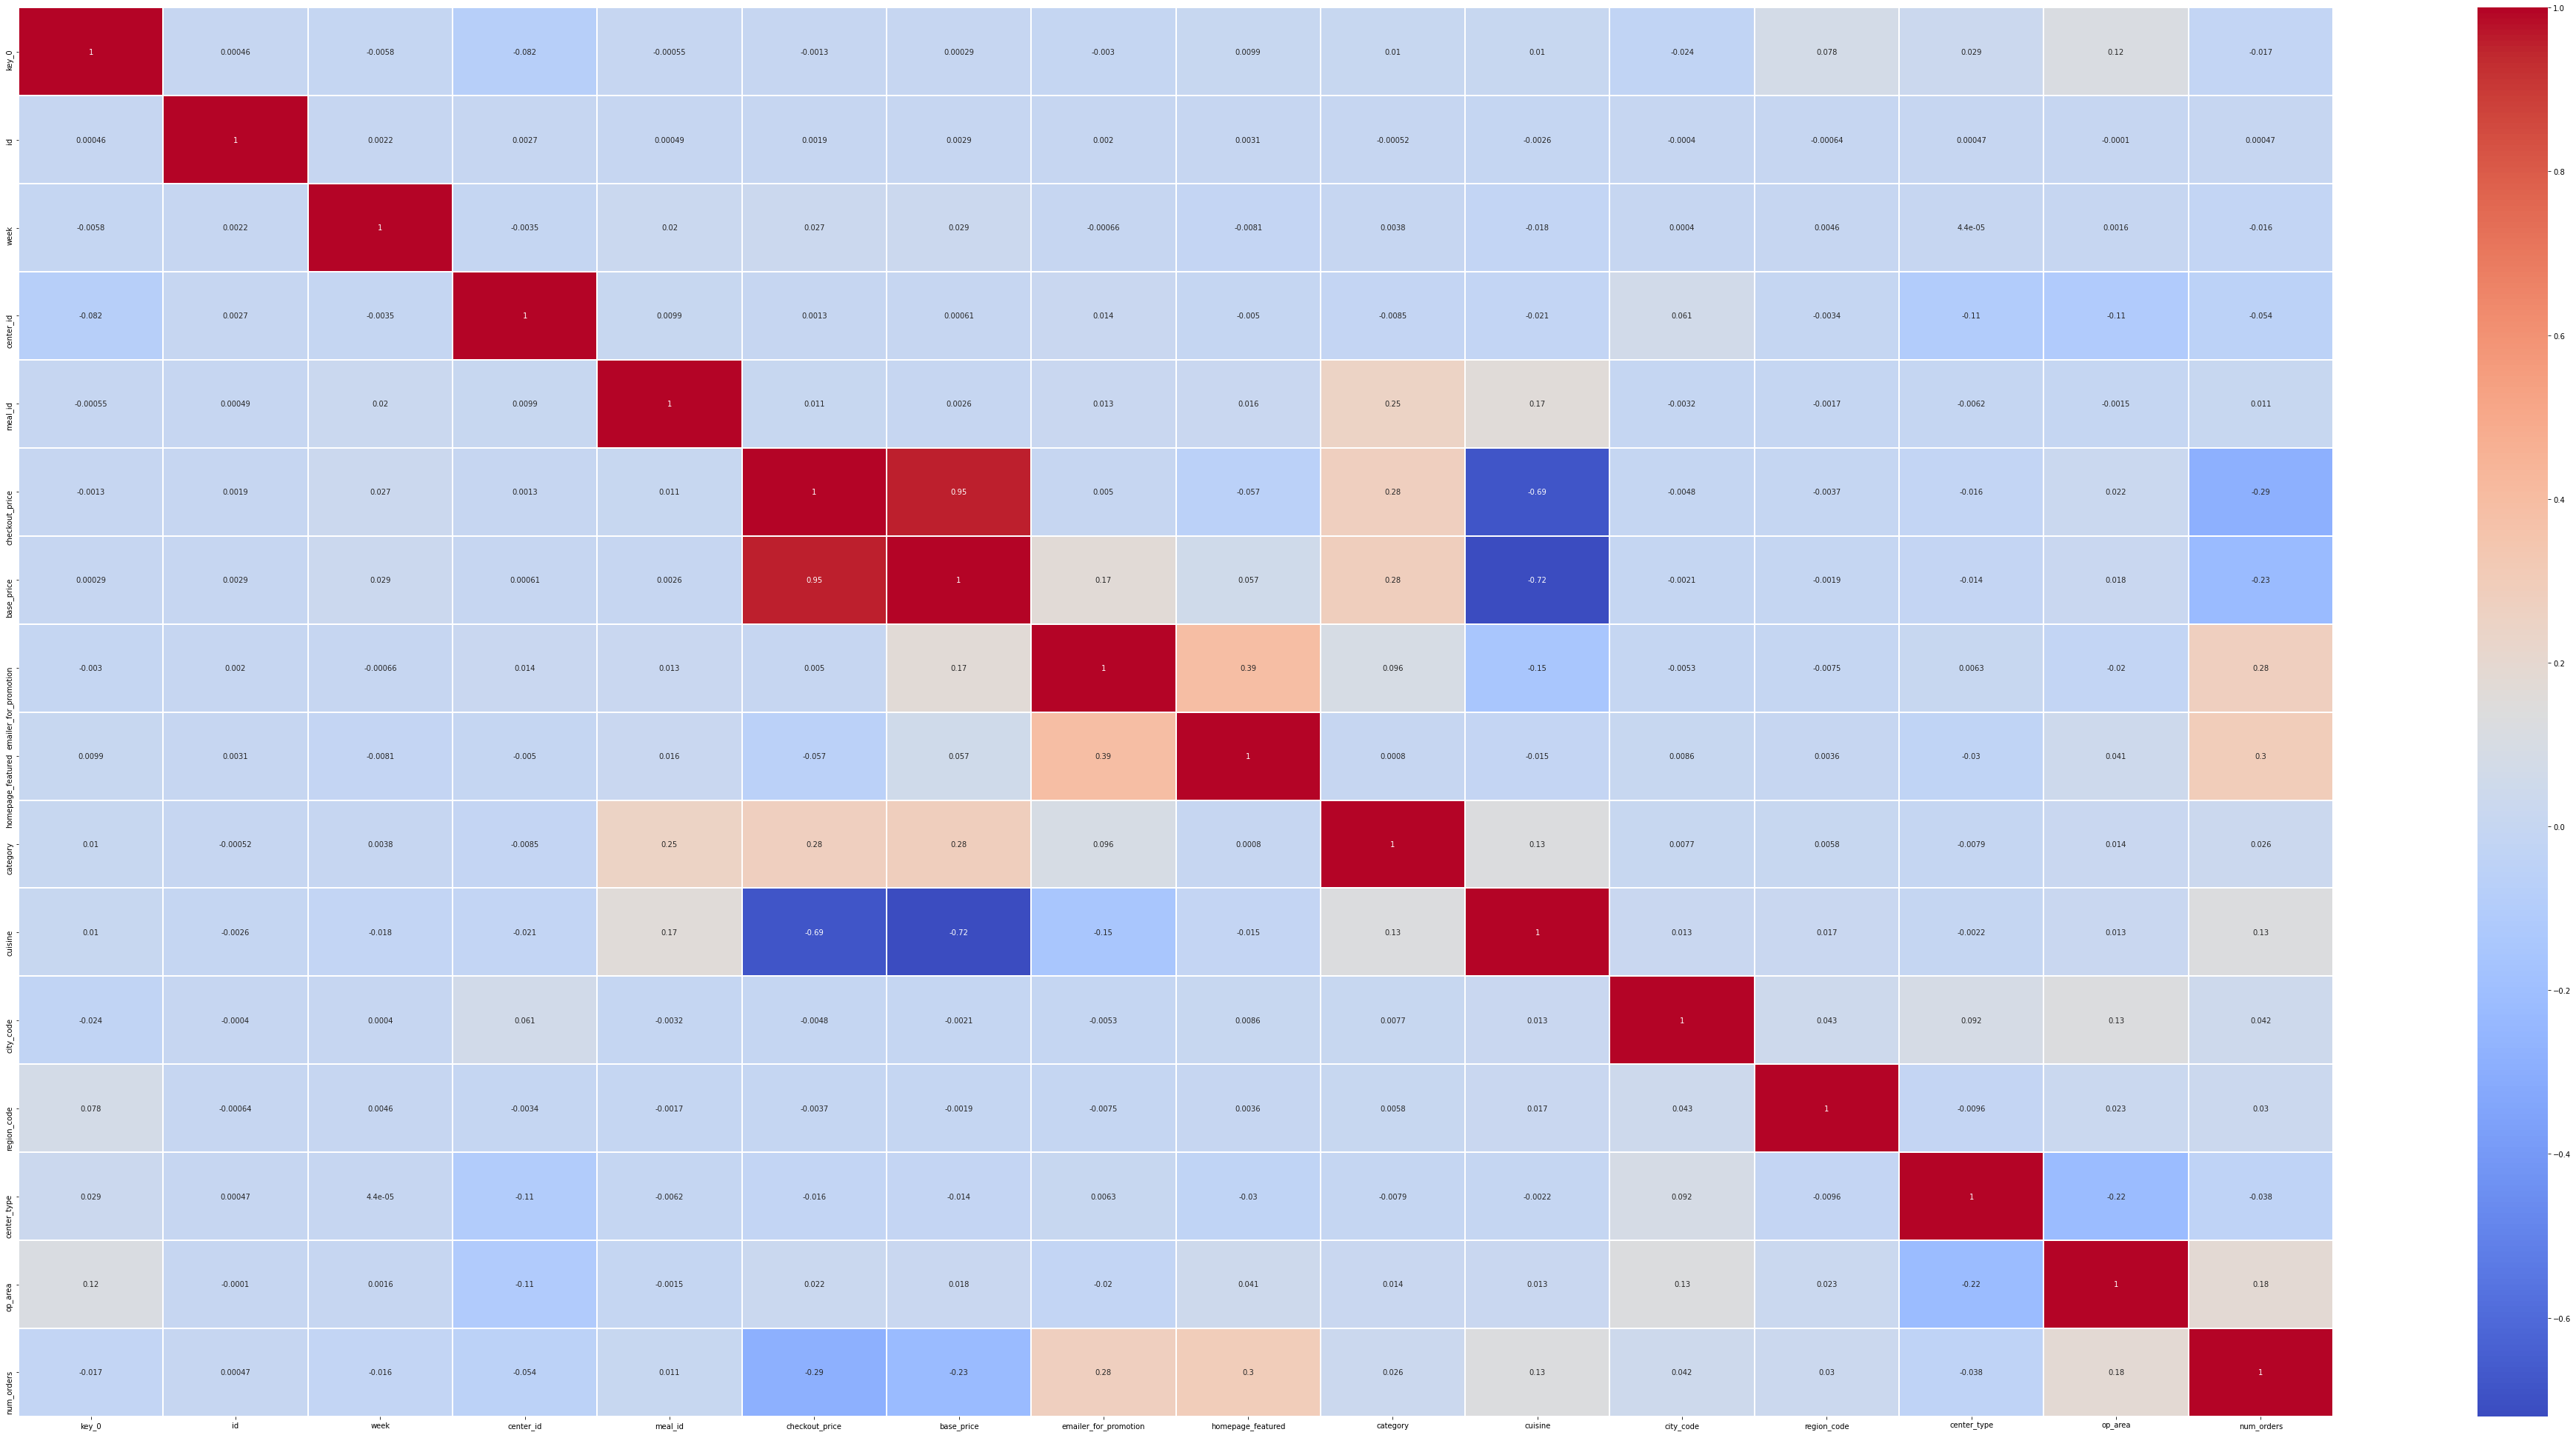

In [140]:
fig, ax = plt.subplots()
fig.set_size_inches(70, 35)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

In [96]:
# function will delete a column from train , val and test
def delete_col(col ,traindf = x_train,testdf = x_test):
    traindf.drop(col, axis =1,inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,testdf

In [97]:
# x_train, x_test = delete_col(['id'])


In [141]:
x_train.shape, x_test.shape

((456480, 14), (46, 14))

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)


RandomForestRegressor()

In [143]:
y_pred = rfr.predict(x_test)
y_pred

array([410.07,  32.7 ,  56.62, 126.54,  62.47, 452.55, 462.61,  97.37,
       175.68,  40.66, 238.73,  87.38, 395.92, 104.74,  69.05, 296.3 ,
       721.31, 138.74,  38.25,  34.77, 451.07, 126.72,  65.38, 207.61,
       790.47, 218.91, 740.03, 275.74,  31.43, 176.47,  99.37, 410.71,
        33.67, 553.11,  27.79,  62.42,  58.76, 322.44,  44.47, 401.07,
        45.18, 404.72, 340.52, 116.58,  46.37,  39.47])

In [144]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_test, y_pred ))

0.5339478699457867

In [145]:
from xgboost import XGBRegressor
XG = XGBRegressor()
XG.fit(x_train, y_train)
y_pred = XG.predict(x_test) 
y_pred[y_pred<0] = 0 
from sklearn import metrics 
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

RMSLE: 66.6862605639774


In [146]:
df4 = pd.read_csv('test_Q.csv')
df5 = pd.merge(df4, df2,  on="meal_id", how="outer")
dft = pd.merge(df5,df3, on='center_id', how='outer') 
dft.head()

lb1 = LabelEncoder()
dft['center_type'] = lb1.fit_transform(dft['center_type'])

lb2 = LabelEncoder()
dft['category'] = lb2.fit_transform(dft['category'])

lb3 = LabelEncoder()
dft['cuisine'] = lb3.fit_transform(dft['cuisine'])

# dft.drop(['id','category','region_code','center_type'],axis=1,inplace=True)

In [151]:
dft

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,0,3,647,56,2,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,0,3,647,56,2,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,0,3,647,56,2,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,0,3,647,56,2,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,0,3,647,56,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1412025,146,61,2104,583.03,581.03,0,0,4,0,473,77,0,4.5
32569,1287019,147,61,2104,582.03,582.03,0,1,4,0,473,77,0,4.5
32570,1396176,149,61,2104,629.53,629.53,0,0,4,0,473,77,0,4.5
32571,1331977,150,61,2104,629.53,629.53,0,0,4,0,473,77,0,4.5


In [148]:
RF_dft_pred = XG.predict(dft)

In [149]:
RF_dft_pred[RF_dft_pred<0]=0

In [152]:
df_final = pd.read_csv('sample.csv')
df_final['num_orders'] = RF_dft_pred
df_final['id'] = dft['id']
df_final.to_csv('xgdft.csv')